In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

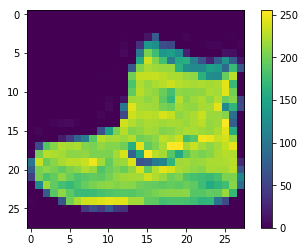

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

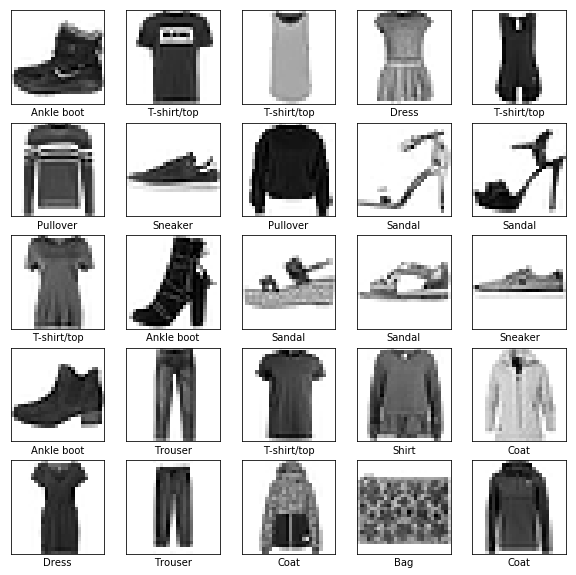

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [7]:
# setup the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
# compile the model
# 在模型可以进行训练之前需要先对模型进行设置
# 添加 Loss Function
# 添加 优化器
# 添加 度量指标
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.4949 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3704 - acc: 0.8660
Epoch 3/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3356 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.3126 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.2947 - acc: 0.8910


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 75us/step
Test accuracy: 0.8756


In [11]:
predictions = model.predict(test_images)

In [12]:
predictions[0]

array([  1.05934600e-06,   1.26745533e-06,   6.84075167e-06,
         1.26293537e-06,   1.83706959e-06,   6.18663570e-03,
         1.75259393e-05,   1.58968251e-02,   2.18974295e-04,
         9.77667689e-01], dtype=float32)

In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color))

def plot_value_array(i, predictions_array, true_label):
     predictions_array, true_label = predictions_array[i], true_label[i]
     plt.grid(False)
     plt.xticks([])
     plt.yticks([])
     thisplot = plt.bar(range(10), predictions_array, color="#777777")
     plt.ylim([0, 1]) 
     predicted_label = np.argmax(predictions_array)
 
     thisplot[predicted_label].set_color('red')
     thisplot[true_label].set_color('blue')

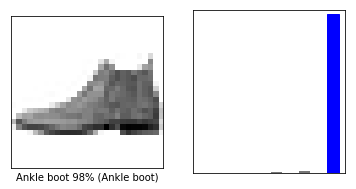

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

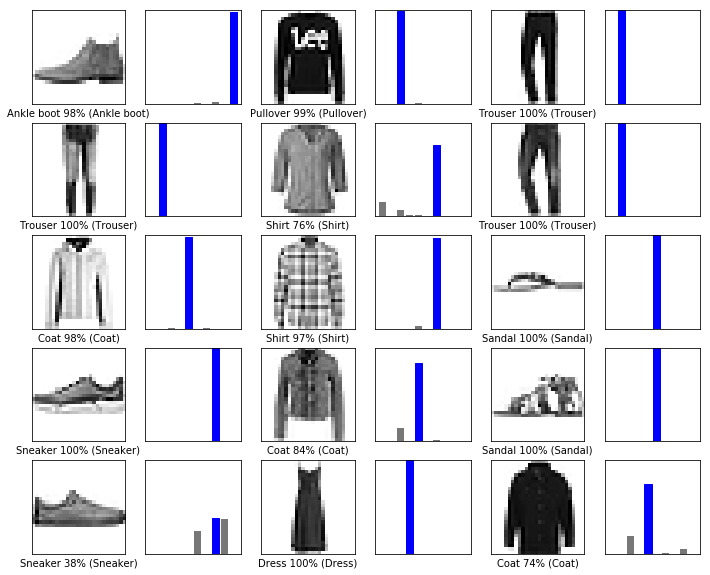

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
